# Questão 1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import AgglomerativeClustering

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df['target'] = cancer_data.target
df.target.value_counts()

,count
target,
1,357
0,212


In [21]:
features = df.drop('target', axis=1)

agg_clustering = AgglomerativeClustering()
agg_clustering.fit(features)

cluster_labels = agg_clustering.fit_predict(features)

df['cluster'] = cluster_labels

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

In [22]:
contingency_table = pd.crosstab(df['target'], df['cluster'])

contingency_table

cluster,0,1
target,,
0,126,86
1,357,0


# Questão 2


In [25]:
k_range = range(2, 11)
sse = []
for k in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')

    cluster_labels = agg_clustering.fit_predict(features)

    contingency_table = pd.crosstab(df['target'], cluster_labels)
    print(f"--- Clusters: {k} ---")
    print(contingency_table)
    print()

    current_sse = 0
    for i in range(k):
        points_in_cluster = features[cluster_labels == i]
        centroid = points_in_cluster.mean(axis=0)
        current_sse += np.sum((points_in_cluster - centroid) ** 2).sum()

    sse.append(current_sse)


--- Clusters: 2 ---
col_0     0   1
target         
0       126  86
1       357   0

--- Clusters: 3 ---
col_0    0    1    2
target              
0       86  120    6
1        0   97  260

--- Clusters: 4 ---
col_0     0   1    2   3
target                  
0       120  75    6  11
1        97   0  260   0

--- Clusters: 5 ---
col_0    0   1    2   3   4
target                     
0       75  11    6  64  56
1        0   0  260  96   1

--- Clusters: 6 ---
col_0     0   1   2   3   4   5
target                         
0         6  11  29  64  56  46
1       260   0   0  96   1   0

--- Clusters: 7 ---
col_0    0   1   2    3   4   5    6
target                              
0       11  64  29    2  56  46    4
1        0  96   0  128   1   0  132

--- Clusters: 8 ---
col_0    0    1   2   3   4   5    6  7
target                                 
0       64    2  29  10  56  46    4  1
1       96  128   0   0   1   0  132  0

--- Clusters: 9 ---
col_0    0    1   2   3   4   5    6 

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

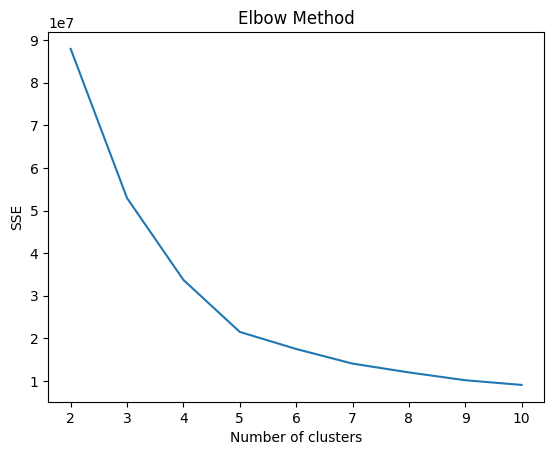

In [27]:
plt.plot(k_range, sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()